In [10]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import random

from utils import *
from environment import ButtonsToy
from learner import Learner, bayesian_update, compute_policy, projection
from teacher import BaysesianTeacher

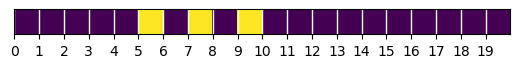

In [11]:
observation_env = ButtonsToy(20, 3)
observation_env.render()

## Learners

In [114]:
types = [0, 1, 2, 3]
traj_size = 60
N = 100
N_envs = 5
dict  = {}
for type in types:
    learner = Learner(type)
    dict[type] = {'actions' : [],
                  'rewards' : []}
    for _ in range(N_envs):
        observation_env = ButtonsToy(20, 3)
        for _ in range(N):
            learner.init_env(observation_env)
            actions, rewards = learner.act(traj_size)
            dict[type]['actions'].append(actions)
            dict[type]['rewards'].append(rewards)

/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:26: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:26: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)


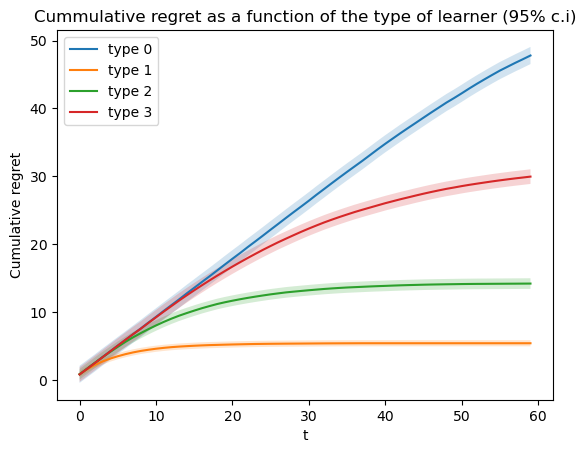

In [115]:
for ii,type in enumerate(types):
    all_rewards = np.array(dict[type]['rewards'])
    all_cum_regrets = np.cumsum(np.ones_like(all_rewards) - all_rewards, axis=1)
    mean, std = np.mean(all_cum_regrets, axis=0), np.std(all_cum_regrets)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(traj_size), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Cumulative regret')
    plt.xlabel('t')
    plt.title('Cummulative regret as a function of the type of learner (95% c.i)')
    plt.legend()

## Bayesian teacher

Observation environment


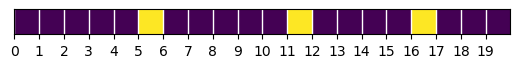

Demonstration environment


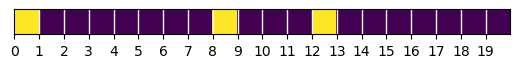

In [12]:
observation_env = ButtonsToy(20, 3)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(20, 3)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=3)
learner.init_env(observation_env)

### Predict learner type

In [ ]:
N = 100
N_envs = 10
num_obs = 100

dict = {}

for type in range(num_types):
    dict[type] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(20, 3)
        demonstration_env = ButtonsToy(20, 3)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            for _ in range(num_obs):
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
            dict[type].append(accuracies)

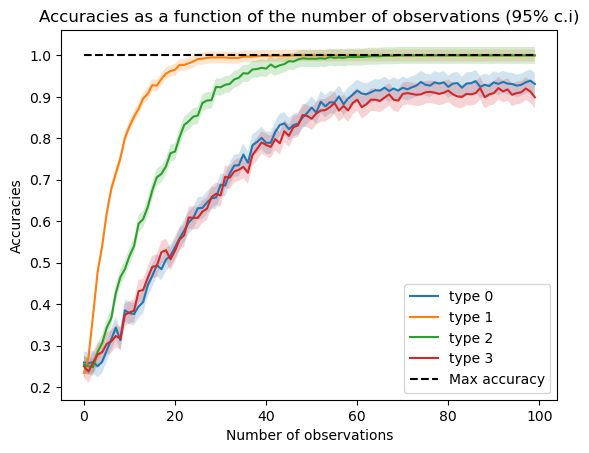

In [5]:
for type in range(num_types):
    accuracies = np.array(dict[type])
    mean, std = np.mean(accuracies, axis=0), np.std(accuracies)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Accuracies')
    plt.xlabel('Number of observations')
    plt.title('Accuracies as a function of the number of observations (95% c.i)')
plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max accuracy", ls='--')
plt.legend();

In [25]:
## Failure mode studies ERASE!!

N = 100
N_envs = 1
num_obs = 300

LOG = True

dict = {}

for type in range(num_types):
    dict[type] = {}
    dict[type]['accuracies'] = []
    dict[type]['beliefs'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(20, 3)
        demonstration_env = ButtonsToy(20, 3)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            all_beliefs = []
            tag_traj = []
            for _ in range(num_obs):
                all_beliefs.append(teacher.beliefs.copy())
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
                tag_traj.append(traj)

            # If prediction failure after 300 observations
            if LOG and type != teacher.predict_learner_type():
                # print LOG
                print(f'LOG FAILURE : type {type} beliefs {teacher.beliefs} trajectory {tag_traj}')

            dict[type]['beliefs'].append(all_beliefs)
            dict[type]['accuracies'].append(accuracies)

LOG FAILURE : type 0 beliefs [0.5 0.  0.  0.5] trajectory [([1], [1.0]), ([1], [1.0]), ([11], [0.0]), ([3], [0.0]), ([17], [0.0]), ([18], [0.0]), ([6], [0.0]), ([19], [0.0]), ([9], [0.0]), ([17], [0.0]), ([15], [0.0]), ([6], [0.0]), ([6], [0.0]), ([16], [0.0]), ([7], [0.0]), ([16], [0.0]), ([18], [0.0]), ([19], [0.0]), ([4], [0.0]), ([5], [0.0]), ([14], [0.0]), ([15], [0.0]), ([0], [0.0]), ([8], [1.0]), ([10], [0.0]), ([5], [0.0]), ([10], [0.0]), ([12], [0.0]), ([6], [0.0]), ([1], [1.0]), ([0], [0.0]), ([16], [0.0]), ([5], [0.0]), ([8], [1.0]), ([12], [0.0]), ([9], [0.0]), ([4], [0.0]), ([10], [0.0]), ([14], [0.0]), ([18], [0.0]), ([12], [0.0]), ([13], [0.0]), ([8], [1.0]), ([10], [0.0]), ([6], [0.0]), ([9], [0.0]), ([9], [0.0]), ([14], [0.0]), ([2], [1.0]), ([8], [1.0]), ([1], [1.0]), ([1], [1.0]), ([2], [1.0]), ([2], [1.0]), ([8], [1.0]), ([1], [1.0]), ([1], [1.0]), ([2], [1.0]), ([8], [1.0]), ([2], [1.0]), ([1], [1.0]), ([8], [1.0]), ([1], [1.0]), ([8], [1.0]), ([2], [1.0]), ([8], [

### Demonstrate

Observation environment


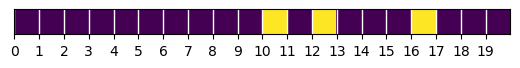

Demonstration environment


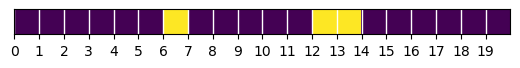

In [3]:
observation_env = ButtonsToy(20, 3)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(20, 3)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
num_demo_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=1)
learner.init_env(observation_env)

In [8]:
N = 100
N_envs = 3
num_obs = 50

n_eval = 20

dict = {}
alpha_values = [0.01, 0.02]
method_values = ['argmax', 'mean']

for method in method_values:
    dict[method] = {}
    for alpha in alpha_values:
        dict[method][alpha] = {}
        for type in range(num_types):
            dict[method][alpha][type] = {}
            dict[method][alpha][type]['rewards'] = []
            dict[method][alpha][type]['demo'] = []
            for _ in range(N_envs):
                # Init envs
                observation_env = ButtonsToy(20, 3)
                demonstration_env = ButtonsToy(20, 3)
                for _ in range(N):
                    cum_rewards = []
                    all_demo = []
                    for n in range(num_obs):
                        # Init teacher
                        teacher = BaysesianTeacher(env=observation_env,
                                                    num_types=num_types)
                        # Init learner
                        learner = Learner(type)
                        learner.init_env(observation_env)
                        # Observe the learner
                        traj = learner.act(size=n)
                        teacher.observe(traj)
                        # Infers the type of learner and chose demonstration
                        teacher.init_env(demonstration_env)
                        demo = teacher.demonstrate(method=method, alpha=alpha)
                        # Show the demonstration
                        learner.init_env(demonstration_env)
                        learner.observe(demo)
                        # Evaluate hwo helpful has been the demonstration
                        actions, rewards = learner.act(size=n_eval)
                        # Append
                        cum_rewards.append(np.sum(rewards))
                        all_demo.append(len(demo[0]))
                    dict[method][alpha][type]['rewards'].append(cum_rewards)
                    dict[method][alpha][type]['demo'].append(all_demo)

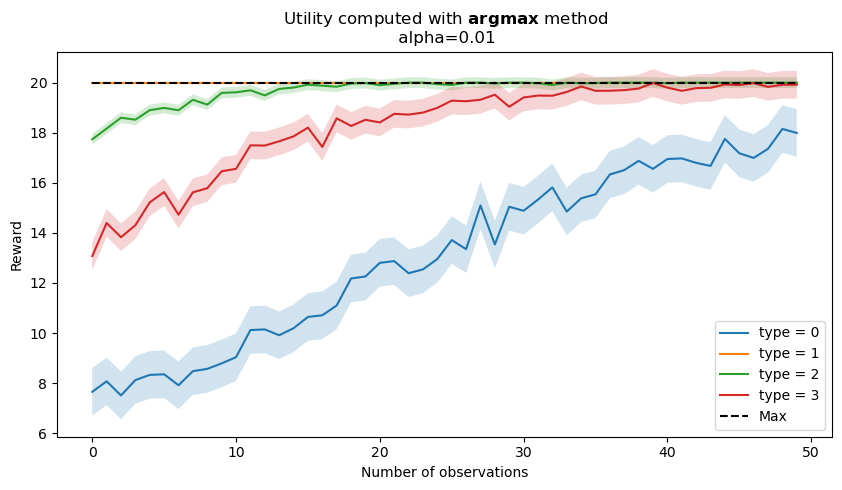

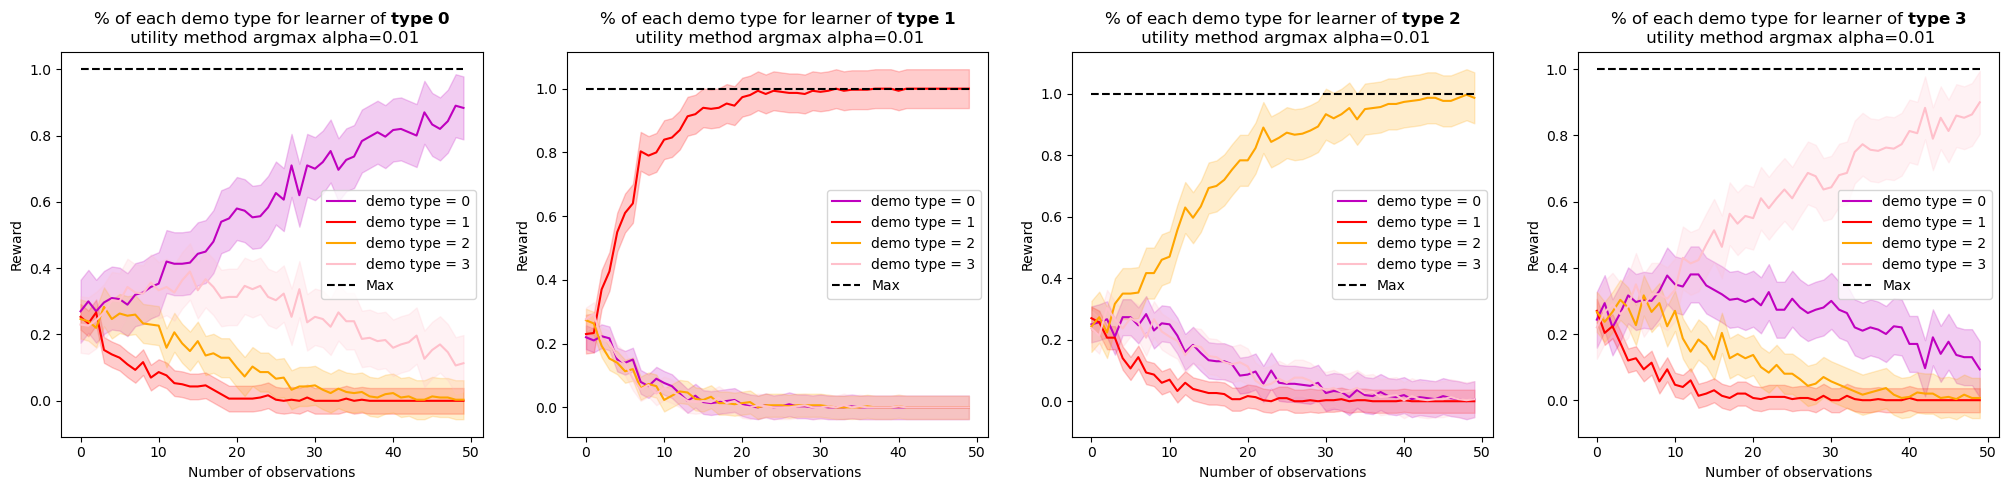

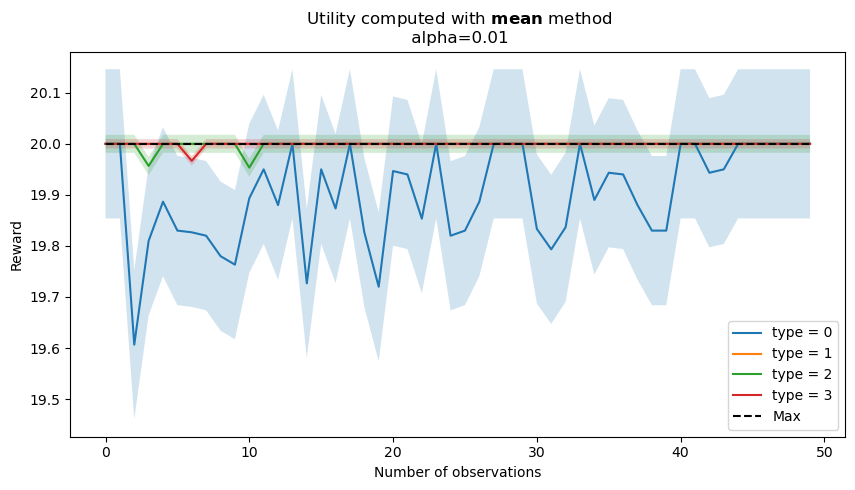

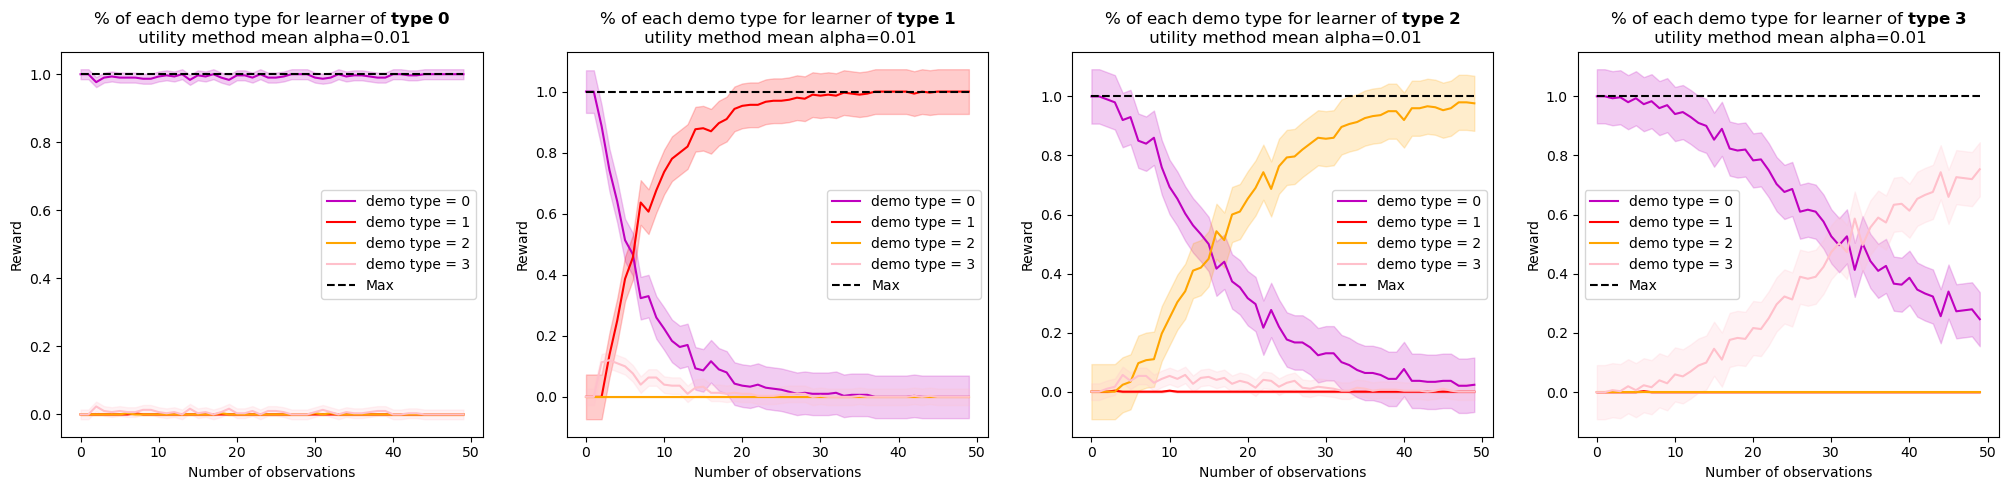

In [9]:
demo_colors = ['m', 'red', 'orange', 'pink']

alpha = alpha_values[0]

for jj,method in enumerate(method_values):
    fig = plt.figure(figsize=(10,5))
    # Rewards on trajectory of size 20 for each type of learner
    for type in range(num_types):
        all_evals = np.array(dict[method][alpha][type]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'type = {type}')
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    plt.title(fr' Utility computed with $\mathbf{{{method}}}$ method ' + f'\n alpha={alpha}')

    plt.xlabel('Number of observations')
    plt.ylabel('Reward')
    plt.legend()

    # Repartition btw type of demonstrations shown
    fig, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        for demo_type in range(num_demo_types):
            demo_rep = np.array(dict[method][alpha][type]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == 20)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'% of each demo type for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' +  f'\n utility method {method} alpha={alpha}')
        ax.set_xlabel('Number of observations')
        ax.set_ylabel('Reward')
        ax.legend()

In [6]:
demo_colors = ['m', 'red', 'orange', 'pink']

alpha = alpha_values[1]

for jj,method in enumerate(method_values):
    fig = plt.figure(figsize=(15,5))
    # Rewards on trajectory of size 20 for each type of learner
    for type in range(num_types):
        all_evals = np.array(dict[method][alpha][type]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'type = {type}')
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    plt.title(fr' Utility computed with $\mathbf{{{method}}}$ method ' + f'\n alpha={alpha}')

    plt.xlabel('Number of observations')
    plt.ylabel('Reward')
    plt.legend()

    # Repartition btw type of demonstrations shown
    fig, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        for demo_type in range(num_demo_types):
            demo_rep = np.array(dict[method][alpha][type]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == 20)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'% of each demo type for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' +  f'\n utility method {method} alpha={alpha}')
        ax.set_xlabel('Number of observations')
        ax.set_ylabel('Reward')
        ax.legend()

IndexError: list index out of range